In [57]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-08-24 03:18:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

100%[======================================>] 129,821     --.-K/s   in 0.004s  

2020-08-24 03:18:12 (29.2 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [58]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
df = pd.read_csv(filename)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Clusturing is based on Location. So Lat and Long values are only required.Lets create new dataframe only using Stn_Name, Long and Lat.

In [59]:
new_df = df[['Stn_Name','Long','Lat']]

In [60]:
new_df.head(5)

,Stn_Name,Long,Lat
0,CHEMAINUS,-123.742,48.935
1,COWICHAN LAKE FORESTRY,-124.133,48.824
2,LAKE COWICHAN,-124.052,48.829
3,DISCOVERY ISLAND,-123.226,48.425
4,DUNCAN KELVIN CREEK,-123.728,48.735


In [61]:
print('NaN values in Lat:',new_df['Lat'].isnull().sum())
print('NaN values in Long:',new_df['Long'].isnull().sum())

NaN values in Lat: 0
NaN values in Long: 0


Imputations are not required. Now lets try to visualize the data points on a sactter plot.

In [62]:
Lat = np.array(new_df['Lat'])
Long = np.array(new_df['Long'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


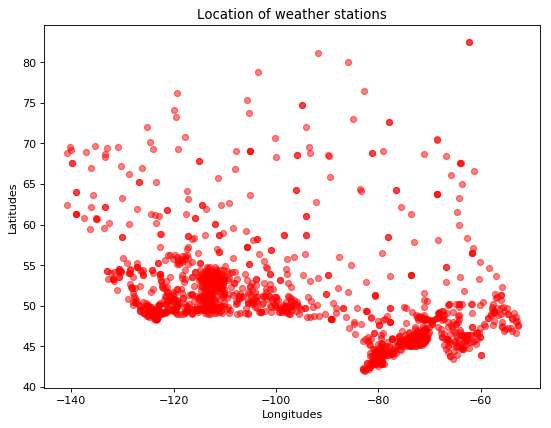

In [87]:
import matplotlib.pyplot as plt

colors = (1,0,0)

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(Long, Lat, s=30, c=colors, alpha=0.5)
plt.title('Location of weather stations')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.show()

In [67]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Clus_dataSet = new_df[['Long','Lat']]
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

In [68]:
print(set(labels))

{0, 1, 2, 3, -1}


In [66]:
new_df['clusture'] = labels
new_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Stn_Name,Long,Lat,clusture
0,CHEMAINUS,-123.742,48.935,0
1,COWICHAN LAKE FORESTRY,-124.133,48.824,0
2,LAKE COWICHAN,-124.052,48.829,0
3,DISCOVERY ISLAND,-123.226,48.425,0
4,DUNCAN KELVIN CREEK,-123.728,48.735,0


In [ ]:
vis_df = new_df

In [81]:
data = []
for clust_num in set(labels):
    x = new_df[new_df.clusture == clust_num]
    data.append((np.array(x.Long),np.array(x.Lat)))


In [90]:
print(data[0])

[-128.524 -122.718 -130.031 -122.597 -122.573 -130.026 -133.7   -136.367
 -140.868 -139.04  -139.05  -139.017 -136.192 -139.128 -133.373 -133.376
 -137.58  -140.15  -140.197 -130.037 -140.848 -135.868 -135.183 -139.839
 -139.839 -136.218 -137.217 -139.133 -132.733 -128.822 -135.067 -135.098
 -124.717 -126.123 -123.433 -124.468 -128.644 -123.467 -117.602 -109.168
 -121.237 -121.237 -111.962 -111.929 -105.133 -115.783 -115.777 -113.726
 -133.517 -117.245 -126.799 -126.753 -124.083 -135.444 -127.209 -117.328
 -133.017 -114.44  -114.383 -123.742 -130.911 -130.228 -110.69  -122.851
 -133.502  -94.072  -96.     -96.078 -108.015 -115.144 -115.135  -83.359
  -83.617  -94.067  -95.85   -95.85  -100.087  -89.726  -89.796  -92.115
  -79.26   -93.433 -119.219 -111.246  -62.333  -62.333  -85.012  -64.146
  -63.789  -64.033  -64.032 -105.138 -105.137 -105.138  -76.53   -76.525
  -61.383  -66.815 -107.823  -68.517  -68.517  -63.578  -71.167  -85.933
  -94.198 -100.267  -82.902  -81.244  -81.243  -68.

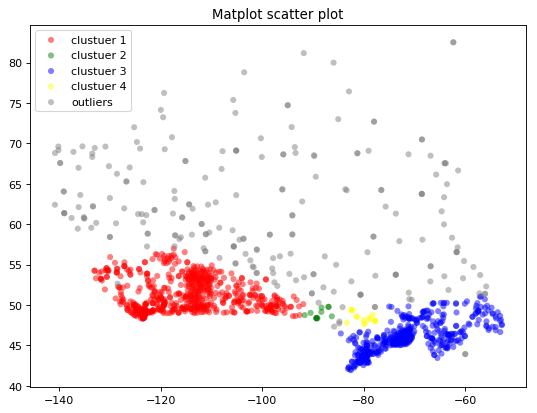

In [89]:
data = []
for clust_num in set(labels):
    sorted_ = new_df[new_df.clusture == clust_num]
    data.append((np.array(sorted_.Long),np.array(sorted_.Lat)))


data = tuple(data)
colors = ("red", "green", "blue", "yellow","grey")
groups = ("clustuer 1", "clustuer 2", "clustuer 3", "clustuer 4","outliers")

# # Create plot
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()